In [6]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from data.TongueDataset import TongueDataset, RandomTransform
from models.unet import ResUNet, UNet

In [2]:
train_set = TongueDataset(image_path='./data/img', label_path='./data/gt', transform=RandomTransform())
img, gt = train_set[2]
print(img.max())

./data/img
tensor(0.9882)


In [3]:
model = UNet()
out = model(img.unsqueeze(0))
print(out.max())
# save_seg_images(img.unsqueeze(0), gt.unsqueeze(0), out,'out.jpg', 1)

tensor(0.5120, grad_fn=<MaxBackward1>)


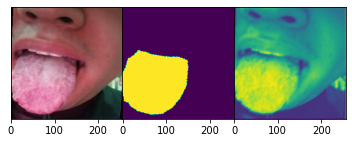

In [9]:
def save_seg_images(images, masks, outputs, file_path):
    B = images.shape[0]
    for i in range(B):
        plt.figure()
        plt.subplot(B,3,i*3+1)
        plt.yticks([])
        plt.imshow(images[i].permute(1, 2, 0).numpy())#.astype(np.float32)
        plt.subplot(B,3,i*3+2)
        plt.yticks([])
        plt.imshow(masks[i].permute(1, 2, 0).numpy())
        plt.subplot(B,3,i*3+3)
        plt.yticks([])
        plt.imshow(outputs[i].permute(1, 2, 0).detach().numpy())
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.savefig(file_path)
        
img, gt = train_set[0]
out = model(img.unsqueeze(0))
save_seg_images(img.unsqueeze(0), gt.unsqueeze(0), out,'out.jpg')

In [27]:
from torchvision.models import resnet
import pandas as pd
import re

In [26]:
df = pd.read_excel('data\\Tongue\\2030840_2024年12月07日_13时15分\\2030840_2024年12月07日_13时15分.xls', engine='openpyxl', skiprows=1, dtype={'病例ID': str})
df.to_csv('test_excel.csv', encoding='gbk')


d:\Anaconda3\envs\cv\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


TypeError: to_csv() got an unexpected keyword argument 'dtype'

In [19]:
df.head()

,病例ID,病历生成时间,性别,年龄,身高,体重,血压,血糖,出生日期,题库类型,...,疾病预警状态,疾病预警备注,冠心病概率,冠心病风险等级,糖尿病概率,糖尿病风险等级,高血压概率,高血压风险等级,问诊,Unnamed: 91
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,问诊题目,回答
1,1314943274431021056,2024-12-07 13:15:07,女,64.0,NaN,NaN,NaN,NaN,NaN,9种体质,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.您手脚发凉吗？,很少
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.您胃脘部、背部或腰膝部有冷感吗？,很少
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.您感到怕冷、衣服比别人穿得多吗？,没有
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.您比一般人耐受不了寒冷吗？(冬天的寒冷，夏天的冷空调、电扇等),没有


In [31]:
df.loc[1,'病例ID']
match = re.match(r'^(\d+)\.?(.*)$', '4.您说话声音低弱无力吗?（指说话没有力气)')
print(match.group(1), match.group(2))

4 您说话声音低弱无力吗?（指说话没有力气)


In [32]:
for i in range(1,34):
    print(i, end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 

In [12]:

img = Image.open('data\\img\\1.jpg').convert("RGB")
gt = Image.open('data\\Tongue_test\\003_2024年12月20日_11时36分\\mask.png').convert("L")  # 单通道标签

In [13]:
gt = np.array(gt)
gt.max(), gt.sum()

(1, 136170)

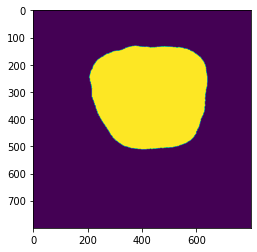

In [14]:

plt.figure()
plt.imshow(gt)
plt.show()

In [9]:
import os
import pandas as pd
import re
from PIL import Image

df = pd.read_csv(os.path.join('data', 'Tongue_test', 'data1.csv'), encoding='gbk')
for idx in range(len(df)):
    df.loc[idx, 'tongue_image'] = os.path.join(*df.loc[idx, 'tongue_image'].split('\\'))
    df.loc[idx, 'mask_image'] = os.path.join(*df.loc[idx, 'mask_image'].split('\\'))
df.to_csv(os.path.join('data', 'Tongue_test', 'data1.csv'), encoding='gbk')